In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import ScalarFormatter

## Extract the Data

In [2]:
df_of_orders = pd.read_csv('orders.csv')
df_of_stores = pd.read_csv('stores.csv')
# check for any null in the data frame
df_of_orders.isnull().any()
del df_of_orders["Unnamed: 0"]
df_of_orders
df_of_orders.gmv.sum()

25658939.44

In [3]:
# check for any nulls in the data frame
df_of_orders.isnull().any()

store_id                   False
week                       False
orders                     False
cancelled_orders           False
bad_ratings                False
gmv                        False
recurrent_customers        False
total_delivery_duration    False
delivery_time_below_30     False
dtype: bool

In [4]:
# check the data type for the data frame
df_of_orders.dtypes

store_id                     int64
week                        object
orders                       int64
cancelled_orders           float64
bad_ratings                  int64
gmv                        float64
recurrent_customers          int64
total_delivery_duration      int64
delivery_time_below_30       int64
dtype: object

In [5]:
# check for any nulls in the data frame
df_of_stores.isnull().any()

Unnamed: 0          False
region              False
country             False
virtual_store_id    False
creation_week       False
category            False
mother_store_id     False
tags                 True
dtype: bool

In [6]:
# there are null values in the seconde db so we need to check how many rows has null value inside
df_of_stores.isnull().sum()

Unnamed: 0            0
region                0
country               0
virtual_store_id      0
creation_week         0
category              0
mother_store_id       0
tags                222
dtype: int64

In [7]:
# 222 out of 5000 rows is to big to just delete we will bulid a catgory for themselfe
df_of_stores["tags"].fillna("No cat", inplace = True)
df_of_stores

,Unnamed: 0,region,country,virtual_store_id,creation_week,category,mother_store_id,tags
0,0,EEMEA,KZ,187497,5/18/2020,Menu split,168851,Burger
1,1,EEMEA,KE,201015,6/29/2020,Menu split,73919,Chicken
2,2,EEMEA,RO,211953,8/17/2020,Menu split,132931,Pizza
3,3,EEMEA,RO,203477,7/13/2020,Menu split,203424,Desserts
4,4,EEMEA,MA,220683,9/28/2020,Menu split,190358,Burger
...,...,...,...,...,...,...,...,...
4854,4854,Latam,EC,230822,10/26/2020,Menu split,122167,Burger
4855,4855,Latam,AR,214186,8/24/2020,Menu split,203205,Sushi
4856,4856,Latam,PE,234560,11/2/2020,Menu split,191084,No cat
4857,4857,Latam,EC,219481,9/21/2020,Menu split,144019,Ecuadorian


In [8]:
unclean_virtual_df = pd.merge(df_of_orders, df_of_stores,  how='inner', left_on=['store_id'], right_on = ['virtual_store_id'])
unclean_virtual_df.gmv.sum()

4043822.59

In [9]:
unclean_real_store_df = pd.merge(df_of_orders, df_of_stores,  how='inner', left_on=['store_id'], right_on = ['mother_store_id'])
unclean_real_store_df=unclean_real_store_df.drop(['virtual_store_id', 'creation_week','tags','category','Unnamed: 0'], axis=1)
unclean_real_store_df=unclean_real_store_df.drop_duplicates()
unclean_real_store_df

,store_id,week,orders,cancelled_orders,bad_ratings,gmv,recurrent_customers,total_delivery_duration,delivery_time_below_30,region,country,mother_store_id
0,227272,12/28/2020,1,0.005000,0,17.02,1,29,0,Europe,PL,227272
14,227272,12/7/2020,2,0.005000,0,44.44,2,78,1,Europe,PL,227272
28,227272,11/30/2020,7,0.171667,0,53.47,4,191,0,Europe,PL,227272
42,227272,11/23/2020,2,0.005000,0,60.36,2,61,1,Europe,PL,227272
56,227272,11/16/2020,1,0.005000,0,8.39,1,28,1,Europe,PL,227272
...,...,...,...,...,...,...,...,...,...,...,...,...
38737,117416,9/28/2020,6,0.005000,0,31.57,3,310,0,EEMEA,KZ,117416
38739,205441,9/28/2020,1,1.005000,0,0.00,1,0,0,EEMEA,RO,205441
38740,131748,9/28/2020,1,1.005000,0,0.00,1,0,0,Europe,ES,131748
38741,80302,9/28/2020,2,0.005000,0,24.89,2,132,0,Latam,AR,80302


In [10]:
unclean_real_store_df.gmv.sum()
unclean_virtual_df.gmv.sum()

4043822.59

In [11]:
df_check_2 =df_of_orders.store_id.isin( df_of_stores.mother_store_id) 
df_check_2.value_counts()

True     26170
False    22737
Name: store_id, dtype: int64

In [12]:
# This is the part where I check for any problems in the data in terms of 
#having a virtual store in the real store and the opposite.
df_check_real_in_vir=df_of_stores.mother_store_id.isin( df_of_stores.virtual_store_id) 
df_check_real_in_vir.value_counts()

False    4775
True       84
Name: mother_store_id, dtype: int64

In [13]:
df_check_vir_in_real=df_of_stores.virtual_store_id.isin( df_of_stores.mother_store_id) 
df_check_vir_in_real.value_counts()

False    4824
True       35
Name: virtual_store_id, dtype: int64

In [14]:
# Adding the 2 new columns to the df of stores 
df_of_stores['mother_in_vir'] = df_check_real_in_vir
df_of_stores['vir_in_mother'] = df_check_vir_in_real 
df_of_stores

,Unnamed: 0,region,country,virtual_store_id,creation_week,category,mother_store_id,tags,mother_in_vir,vir_in_mother
0,0,EEMEA,KZ,187497,5/18/2020,Menu split,168851,Burger,True,False
1,1,EEMEA,KE,201015,6/29/2020,Menu split,73919,Chicken,False,False
2,2,EEMEA,RO,211953,8/17/2020,Menu split,132931,Pizza,False,False
3,3,EEMEA,RO,203477,7/13/2020,Menu split,203424,Desserts,False,False
4,4,EEMEA,MA,220683,9/28/2020,Menu split,190358,Burger,False,False
...,...,...,...,...,...,...,...,...,...,...
4854,4854,Latam,EC,230822,10/26/2020,Menu split,122167,Burger,False,False
4855,4855,Latam,AR,214186,8/24/2020,Menu split,203205,Sushi,False,False
4856,4856,Latam,PE,234560,11/2/2020,Menu split,191084,No cat,False,False
4857,4857,Latam,EC,219481,9/21/2020,Menu split,144019,Ecuadorian,False,False


In [15]:
#I’ve chosen to delete every row that has a true value in one of the new cells.
#If a cell had true it meant that this store was in both the virtual store id 
#and the real store id and so we can't really know which type is it.
df_of_stores=df_of_stores[(df_of_stores.mother_in_vir == False) & (df_of_stores.vir_in_mother == False)]
df_of_stores=df_of_stores.drop(['mother_in_vir', 'vir_in_mother'], axis=1)
df_of_stores

,Unnamed: 0,region,country,virtual_store_id,creation_week,category,mother_store_id,tags
1,1,EEMEA,KE,201015,6/29/2020,Menu split,73919,Chicken
2,2,EEMEA,RO,211953,8/17/2020,Menu split,132931,Pizza
3,3,EEMEA,RO,203477,7/13/2020,Menu split,203424,Desserts
4,4,EEMEA,MA,220683,9/28/2020,Menu split,190358,Burger
5,5,EEMEA,KE,226802,10/12/2020,Menu split,128562,Japanese
...,...,...,...,...,...,...,...,...
4854,4854,Latam,EC,230822,10/26/2020,Menu split,122167,Burger
4855,4855,Latam,AR,214186,8/24/2020,Menu split,203205,Sushi
4856,4856,Latam,PE,234560,11/2/2020,Menu split,191084,No cat
4857,4857,Latam,EC,219481,9/21/2020,Menu split,144019,Ecuadorian


In [16]:
#Here I check that each virtual store has only one real store parent 
df_check_parent = df_of_stores.groupby('virtual_store_id').apply(lambda x: x['mother_store_id'].unique())
df_check_parent = df_check_parent.apply(pd.Series)
# there is ony one Column which means each vir store has only one parent.
df_check_parent

,0
virtual_store_id,
2983,192141
60681,101084
60870,56100
83501,83333
83812,225512
...,...
251218,250974
251225,12481
251259,15653


In [17]:
# Now we combine between the 2 main data bases to create 2 new data bases 
# one for the vir stores and one for the real ones.
virtual_df = pd.merge(df_of_orders, df_of_stores,  how='inner', left_on=['store_id'], right_on = ['virtual_store_id'])
real_store_df = pd.merge(df_of_orders, df_of_stores,  how='inner', left_on=['store_id'], right_on = ['mother_store_id'])
del virtual_df["Unnamed: 0"]
virtual_df

,store_id,week,orders,cancelled_orders,bad_ratings,gmv,recurrent_customers,total_delivery_duration,delivery_time_below_30,region,country,virtual_store_id,creation_week,category,mother_store_id,tags
0,211360,12/28/2020,1,0.005,1,5.25,1,31,0,Europe,PL,211360,8/17/2020,Menu split,211172,Polish
1,211360,12/21/2020,5,0.005,0,45.18,3,235,0,Europe,PL,211360,8/17/2020,Menu split,211172,Polish
2,211360,12/14/2020,10,0.005,2,72.64,6,370,0,Europe,PL,211360,8/17/2020,Menu split,211172,Polish
3,211360,12/7/2020,4,0.005,0,39.88,2,166,0,Europe,PL,211360,8/17/2020,Menu split,211172,Polish
4,211360,11/30/2020,6,0.005,0,67.98,3,247,0,Europe,PL,211360,8/17/2020,Menu split,211172,Polish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21826,192808,9/28/2020,1,0.005,0,13.33,1,46,0,Europe,PL,192808,6/1/2020,Menu split,192509,Polish
21827,222319,9/28/2020,1,0.005,0,23.06,1,39,0,Europe,ES,222319,9/28/2020,Menu split,5142,Empanadas
21828,220192,9/28/2020,1,0.005,1,30.13,1,63,0,Europe,PL,220192,9/21/2020,Menu split,192386,Snacks
21829,213841,9/28/2020,1,0.005,0,25.47,1,38,0,Europe,ES,213841,8/24/2020,Menu split,153984,Spanish


In [18]:
# Removing some unwanted columns that created duplicates
real_store_df=real_store_df.drop(['virtual_store_id', 'creation_week','tags','category','Unnamed: 0'], axis=1)
real_store_df=real_store_df.drop_duplicates()
real_store_df

,store_id,week,orders,cancelled_orders,bad_ratings,gmv,recurrent_customers,total_delivery_duration,delivery_time_below_30,region,country,mother_store_id
0,227272,12/28/2020,1,0.005000,0,17.02,1,29,0,Europe,PL,227272
14,227272,12/7/2020,2,0.005000,0,44.44,2,78,1,Europe,PL,227272
28,227272,11/30/2020,7,0.171667,0,53.47,4,191,0,Europe,PL,227272
42,227272,11/23/2020,2,0.005000,0,60.36,2,61,1,Europe,PL,227272
56,227272,11/16/2020,1,0.005000,0,8.39,1,28,1,Europe,PL,227272
...,...,...,...,...,...,...,...,...,...,...,...,...
37915,117416,9/28/2020,6,0.005000,0,31.57,3,310,0,EEMEA,KZ,117416
37917,205441,9/28/2020,1,1.005000,0,0.00,1,0,0,EEMEA,RO,205441
37918,131748,9/28/2020,1,1.005000,0,0.00,1,0,0,Europe,ES,131748
37919,80302,9/28/2020,2,0.005000,0,24.89,2,132,0,Latam,AR,80302


In [19]:
# sum of all income from real stores
real_store_df

,store_id,week,orders,cancelled_orders,bad_ratings,gmv,recurrent_customers,total_delivery_duration,delivery_time_below_30,region,country,mother_store_id
0,227272,12/28/2020,1,0.005000,0,17.02,1,29,0,Europe,PL,227272
14,227272,12/7/2020,2,0.005000,0,44.44,2,78,1,Europe,PL,227272
28,227272,11/30/2020,7,0.171667,0,53.47,4,191,0,Europe,PL,227272
42,227272,11/23/2020,2,0.005000,0,60.36,2,61,1,Europe,PL,227272
56,227272,11/16/2020,1,0.005000,0,8.39,1,28,1,Europe,PL,227272
...,...,...,...,...,...,...,...,...,...,...,...,...
37915,117416,9/28/2020,6,0.005000,0,31.57,3,310,0,EEMEA,KZ,117416
37917,205441,9/28/2020,1,1.005000,0,0.00,1,0,0,EEMEA,RO,205441
37918,131748,9/28/2020,1,1.005000,0,0.00,1,0,0,Europe,ES,131748
37919,80302,9/28/2020,2,0.005000,0,24.89,2,132,0,Latam,AR,80302


In [20]:
# sum of all income from vir stores
virtual_df.gmv.sum()

3914891.6000000006

<BarContainer object of 4 artists>

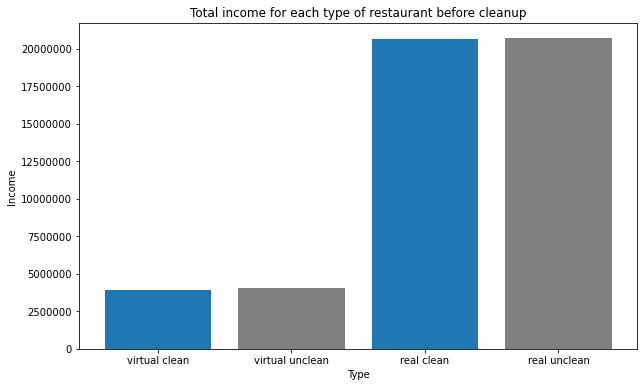

In [21]:
virtual_df.gmv.sum()
real_store_df.gmv.sum()
unclean_real_store_df.gmv.sum()
unclean_virtual_df.gmv.sum()
left=[1,2,3,4]
height=[virtual_df.gmv.sum(),unclean_virtual_df.gmv.sum(),real_store_df.gmv.sum(),unclean_real_store_df.gmv.sum()]
plt.figure(figsize=(10,6))
tick_label=['virtual clean','virtual unclean','real clean','real unclean']
plt.title('Total income for each type of restaurant before cleanup')
plt.xlabel('Type')
plt.ylabel('Income')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['tab:blue', 'grey'])

<BarContainer object of 2 artists>

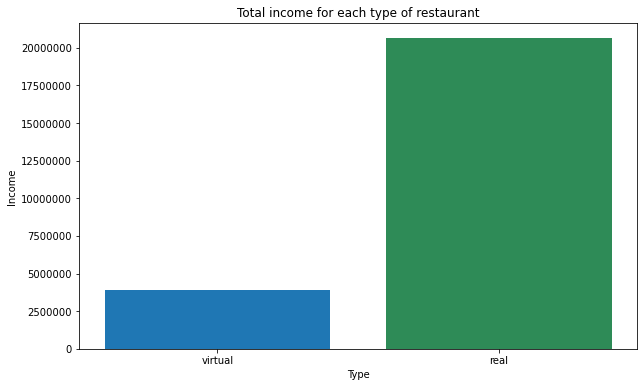

In [22]:
#This graph shows the  sum of income for all real stores and all virtual stores
#In millions 
virtual_df.gmv.sum() 
real_store_df.gmv.sum()
left=[1,2]
height=[virtual_df.gmv.sum(),real_store_df.gmv.sum()]
plt.figure(figsize=(10,6))
tick_label=['virtual','real']
plt.title('Total income for each type of restaurant')
plt.xlabel('Type')
plt.ylabel('Income')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['tab:blue', 'seagreen'])

<BarContainer object of 2 artists>

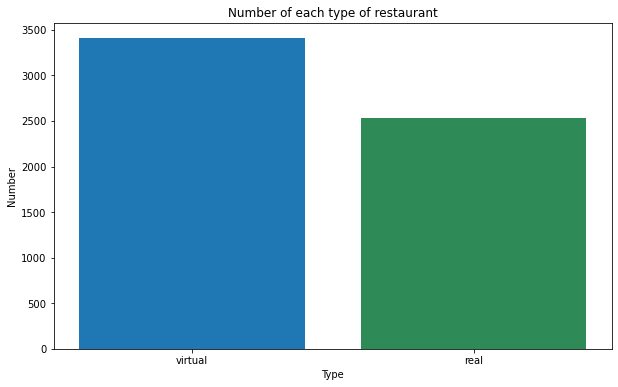

In [23]:
num_of_vir=virtual_df['store_id'].nunique()
num_of_real=real_store_df['mother_store_id'].nunique()
left=[1,2]
height=[num_of_vir,num_of_real]
plt.figure(figsize=(10,6))
tick_label=['virtual','real']
plt.title('Number of each type of restaurant')
plt.xlabel('Type')
plt.ylabel('Number')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['tab:blue', 'seagreen'])

In [24]:
virtual_df.gmv.sum()
real_store_df.gmv.sum()

20639094.15

<BarContainer object of 2 artists>

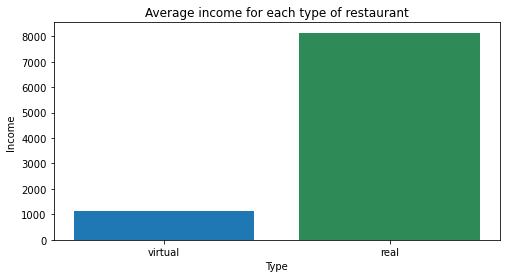

In [25]:
#This graph shows the  avg income for a real stores and the avg income for
#virtual store.
number_of_viru=virtual_df['virtual_store_id'].nunique()
vir_avg=virtual_df.gmv.sum()/number_of_viru
number_of_real=real_store_df['mother_store_id'].nunique()
real_avg=real_store_df.gmv.sum()/number_of_real
left=[1,2]
height=[vir_avg,real_avg]
plt.figure(figsize=(8,4))
plt.title('Average income for each type of restaurant')
plt.xlabel('Type')
plt.ylabel('Income ')
tick_label=['virtual','real']
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['tab:blue', 'seagreen'])

# Now we try to figure out how much money every virtual store made compared to her mother store.

In [26]:
#Creating a data frame only for virtual stores with the store id 
#and its mother store id and the store total revenue
income_per_vir_store=virtual_df.groupby(['store_id','mother_store_id']).gmv.sum().to_frame()
income_per_vir_store=pd.DataFrame(income_per_vir_store.to_records())
income_per_vir_store = income_per_vir_store.rename(columns={'gmv': 'tot_income_vir'})
income_per_vir_store

,store_id,mother_store_id,tot_income_vir
0,2983,192141,81.77
1,60870,56100,7156.38
2,83501,83333,2775.50
3,86956,75697,254.08
4,88077,88073,7239.62
...,...,...,...
3403,251201,190191,0.00
3404,251225,12481,250.39
3405,251259,15653,198.92
3406,251281,16727,139.28


In [27]:
#Creating a data frame only for real stores with the store id 
#and the store total revenue
income_per_real_store=real_store_df.groupby(['mother_store_id']).gmv.sum().to_frame()
income_per_real_store=pd.DataFrame(income_per_real_store.to_records())
income_per_real_store.columns
income_per_real_store = income_per_real_store.rename(columns={'gmv': 'tot_income_real'})
income_per_real_store

,mother_store_id,tot_income_real
0,337,5953.32
1,466,215873.16
2,764,6038.74
3,1521,40502.75
4,2037,1497.34
...,...,...
2530,249516,123.32
2531,249687,63.00
2532,249727,121.95
2533,249863,67.83


In [28]:
#Now we combine these 2 data frames into one big one  
vir_vs_real = pd.merge(income_per_real_store, income_per_vir_store,how='inner',   left_on='mother_store_id', right_on = 'mother_store_id')
vir_vs_real

,mother_store_id,tot_income_real,store_id,tot_income_vir
0,337,5953.32,208698,1589.24
1,466,215873.16,239916,512.18
2,764,6038.74,208482,678.95
3,1521,40502.75,236816,2092.71
4,2037,1497.34,240043,1271.30
...,...,...,...,...
3217,248751,538.95,248990,62.33
3218,249071,83.95,248997,77.36
3219,249516,123.32,249832,16.09
3220,249687,63.00,249813,54.28


In [29]:
# Check for each row in orders data frame if it is any of the 2 new data 
#frames that were crated.
if_store_is_vir =df_of_orders.store_id.isin( df_of_stores.virtual_store_id)
if_store_is_real = df_of_orders.store_id.isin( df_of_stores.mother_store_id)
if_store_is_in_list=if_store_is_vir | if_store_is_real
if_store_is_in_list.value_counts()

True     47682
False     1225
Name: store_id, dtype: int64

In [30]:
#We add a new column which is the measured ration between the virtual store and its mother income.
vir_vs_real = vir_vs_real[vir_vs_real.tot_income_real != 0]
ratio_between_vir_mother=vir_vs_real.tot_income_vir/vir_vs_real.tot_income_real
ratio_between_vir_mother
vir_vs_real['ratio_between_vir_mother'] = ratio_between_vir_mother
vir_vs_real

<ipython-input-30-b2ac94c86529>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vir_vs_real['ratio_between_vir_mother'] = ratio_between_vir_mother


,mother_store_id,tot_income_real,store_id,tot_income_vir,ratio_between_vir_mother
0,337,5953.32,208698,1589.24,0.266950
1,466,215873.16,239916,512.18,0.002373
2,764,6038.74,208482,678.95,0.112432
3,1521,40502.75,236816,2092.71,0.051668
4,2037,1497.34,240043,1271.30,0.849039
...,...,...,...,...,...
3217,248751,538.95,248990,62.33,0.115651
3218,249071,83.95,248997,77.36,0.921501
3219,249516,123.32,249832,16.09,0.130474
3220,249687,63.00,249813,54.28,0.861587


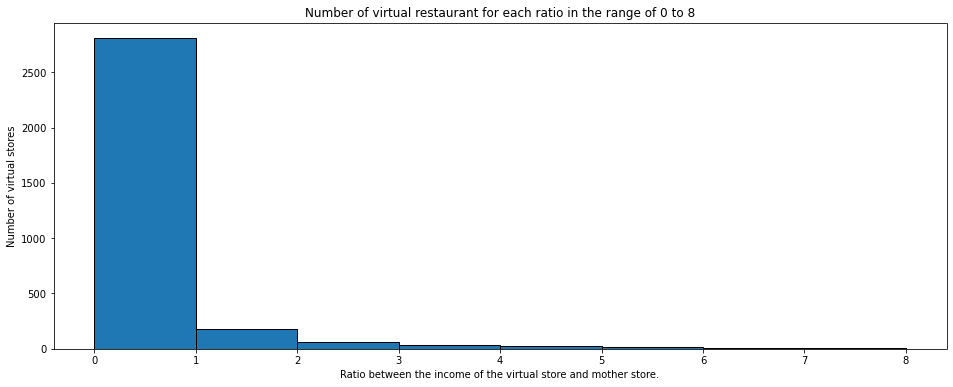

In [31]:
#Graph that shows the number of virtual stores that have a ratio of 0 to 8 
#between themselves and the mother store, in jumps of 0.5.
ranges=np.arange(0,8.5, 1).tolist()
x = ratio_between_vir_mother
df = pd.DataFrame({"vir_vs_real":x})
bins= ranges
plt.figure(figsize=(16,6))
plt.hist(df.values, bins=bins, edgecolor="k")
plt.xticks(bins)
plt.xlabel('Ratio between the income of the virtual store and mother store.')
plt.ylabel('Number of virtual stores')
plt.title('Number of virtual restaurant for each ratio in the range of 0 to 8')
plt.show()

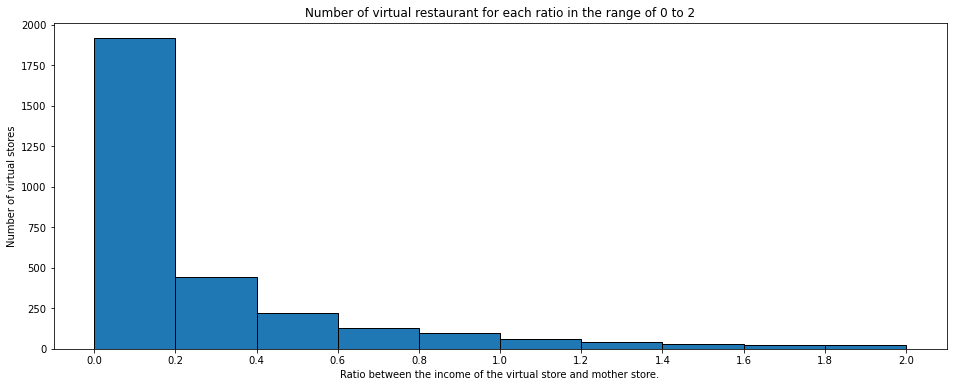

In [32]:
#A more detailed graph for the range of 0 to 2 of that ratio.
ranges=np.arange(0,2.1,0.2).tolist()
x = ratio_between_vir_mother
df = pd.DataFrame({"vir_vs_real":x})
bins= ranges
plt.figure(figsize=(16,6))
plt.hist(df.values, bins=bins, edgecolor="k")
plt.xticks(bins)
plt.xlabel('Ratio between the income of the virtual store and mother store.')
plt.ylabel('Number of virtual stores')
plt.title('Number of virtual restaurant for each ratio in the range of 0 to 2')
plt.show()

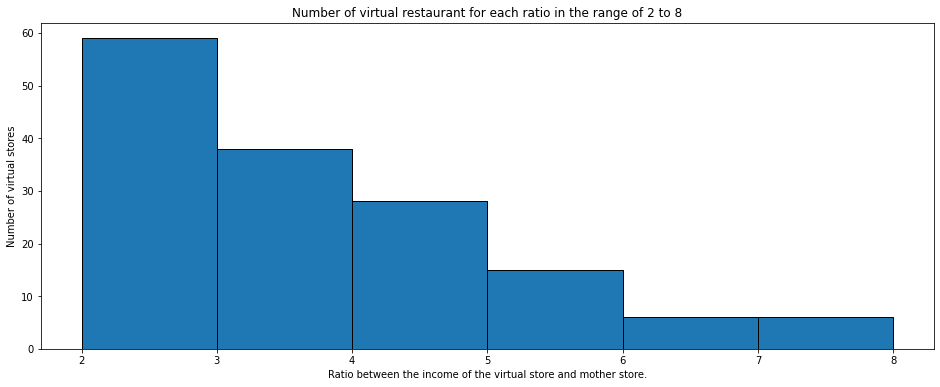

In [33]:
#A more detailed graph for the range of 2 to 8 of that ratio.
ranges=np.arange(2,9,1).tolist()
x = ratio_between_vir_mother
df = pd.DataFrame({"vir_vs_real":x})
bins= ranges
plt.figure(figsize=(16,6))
plt.hist(df.values, bins=bins, edgecolor="k")
plt.xticks(bins)
plt.xlabel('Ratio between the income of the virtual store and mother store.')
plt.ylabel('Number of virtual stores')
plt.title('Number of virtual restaurant for each ratio in the range of 2 to 8')
plt.show()

In [34]:
df_of_tags = virtual_df[["store_id",'tags']].copy()  
df_of_tags.groupby('store_id', as_index = False)
df_of_tags.drop_duplicates().reset_index()

,index,store_id,tags
0,0,211360,Polish
1,14,226443,American
2,26,238480,Qcommerce
3,33,231211,Tacos
4,41,224338,Mexican
...,...,...,...
3403,21826,192808,Polish
3404,21827,222319,Empanadas
3405,21828,220192,Snacks
3406,21829,213841,Spanish


In [35]:
small_vir_vs_real=vir_vs_real.loc[(vir_vs_real['ratio_between_vir_mother'] >= 1.5)]
small_vir_vs_real.sort_values(by=['ratio_between_vir_mother'], ascending=False).head(10)

,mother_store_id,tot_income_real,store_id,tot_income_vir,ratio_between_vir_mother
2783,229873,7.64,239060,2906.88,380.481675
3085,240194,4.65,181774,952.05,204.741935
1773,188563,42.22,210921,3198.85,75.766225
967,118289,25.54,235824,1429.15,55.957322
3086,240194,4.65,237617,183.01,39.356989
3019,237919,44.05,235708,1462.33,33.197049
3111,240700,11.01,240992,344.54,31.293370
2977,235968,42.00,236295,1110.96,26.451429
1918,192828,34.98,192837,833.47,23.827044
2477,220431,90.62,220425,1948.98,21.507173


<BarContainer object of 10 artists>

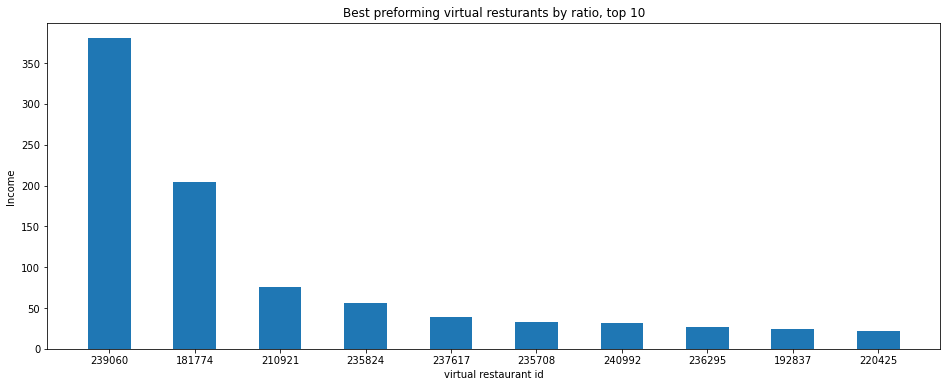

In [36]:
best_res=small_vir_vs_real.nlargest(10,'ratio_between_vir_mother')
name= best_res['store_id'].tolist()
values = best_res['ratio_between_vir_mother'].tolist()
left= list(range(1,11))
height=[]
tick_label=[]
for i in range(len(name)):
    height.append(values[i])
    tick_label.append(name[i]) 
plt.figure(figsize=(16,6))
plt.title('Best preforming virtual resturants by ratio, top 10')
plt.xlabel('virtual restaurant id')
plt.ylabel('Income ')
plt.bar(left, height, tick_label = tick_label, 
       width = 0.5, color = ['tab:blue'])

In [37]:
best_res

,mother_store_id,tot_income_real,store_id,tot_income_vir,ratio_between_vir_mother
2783,229873,7.64,239060,2906.88,380.481675
3085,240194,4.65,181774,952.05,204.741935
1773,188563,42.22,210921,3198.85,75.766225
967,118289,25.54,235824,1429.15,55.957322
3086,240194,4.65,237617,183.01,39.356989
3019,237919,44.05,235708,1462.33,33.197049
3111,240700,11.01,240992,344.54,31.293370
2977,235968,42.00,236295,1110.96,26.451429
1918,192828,34.98,192837,833.47,23.827044
2477,220431,90.62,220425,1948.98,21.507173


<BarContainer object of 15 artists>

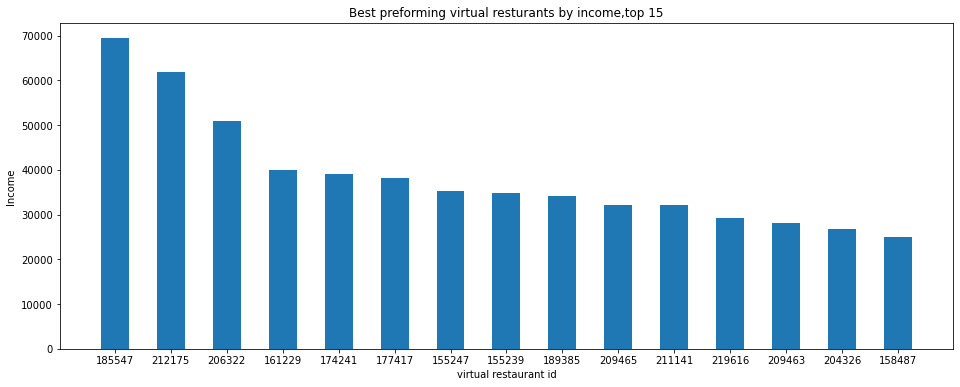

In [38]:
best_res=vir_vs_real.nlargest(15,'tot_income_vir')
name = best_res['store_id'].tolist()
values = best_res['tot_income_vir'].tolist()
left= list(range(1,16))
height=[]
tick_label=[]
for i in range(len(name)):
    height.append(values[i])
    tick_label.append(name[i]) 
plt.figure(figsize=(16,6))
plt.title('Best preforming virtual resturants by income,top 15')
plt.xlabel('virtual restaurant id')
plt.ylabel('Income ')
plt.bar(left, height, tick_label = tick_label, 
       width = 0.5, color = ['tab:blue'])

<BarContainer object of 2 artists>

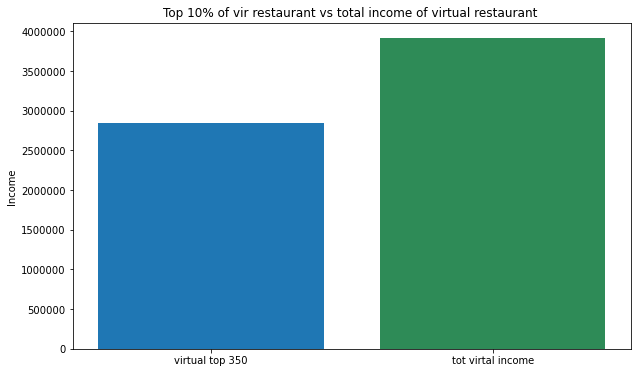

In [39]:
sum_of_400=vir_vs_real.nlargest(350,'tot_income_vir')
tot_vir_sum=virtual_df.gmv.sum()
#virtual_df.gmv.sum()
left=[1,2]
height=[sum_of_400.tot_income_vir.sum(),tot_vir_sum]
plt.figure(figsize=(10,6))
tick_label=['virtual top 350','tot virtal income']
plt.title('Top 10% of vir restaurant vs total income of virtual restaurant ')
plt.ylabel('Income')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['tab:blue', 'seagreen'])

Text(0.5, 1.0, 'Best preforming virtual resturants by income compared to mother resturant,top 15')

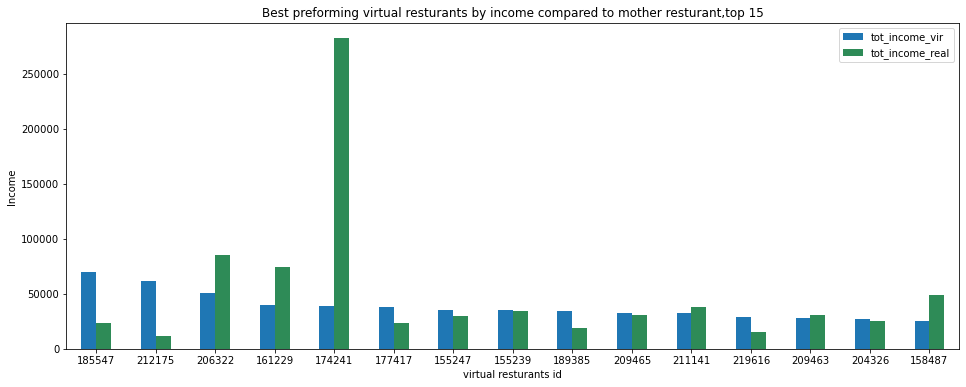

In [40]:

best_res.plot(x="store_id", y=["tot_income_vir", "tot_income_real"], kind="bar",figsize=(16,6),rot=0,color = ('tab:blue','seagreen'))
plt.xlabel('virtual resturants id')
plt.ylabel('Income')
plt.title('Best preforming virtual resturants by income compared to mother resturant,top 15')

In [41]:
tags_df = pd.merge(small_vir_vs_real, df_of_tags,  how='inner', left_on=['store_id'], right_on = ['store_id'])
tags_df.groupby('store_id', as_index = False)
tags_df.drop_duplicates().reset_index()
tags_df=tags_df.groupby('tags', as_index = False).ratio_between_vir_mother.mean()
tags_df

,tags,ratio_between_vir_mother
0,American,1.890224
1,Bakery,5.433521
2,Burger,3.372534
3,Chicken,5.114132
4,Chinese,8.055072
5,Desserts,2.072946
6,Fish shop,4.887302
7,Food,5.890869
8,Georgian,1.765472
9,Gourmet store,4.661889


Text(0, 0.5, 'Ratio')

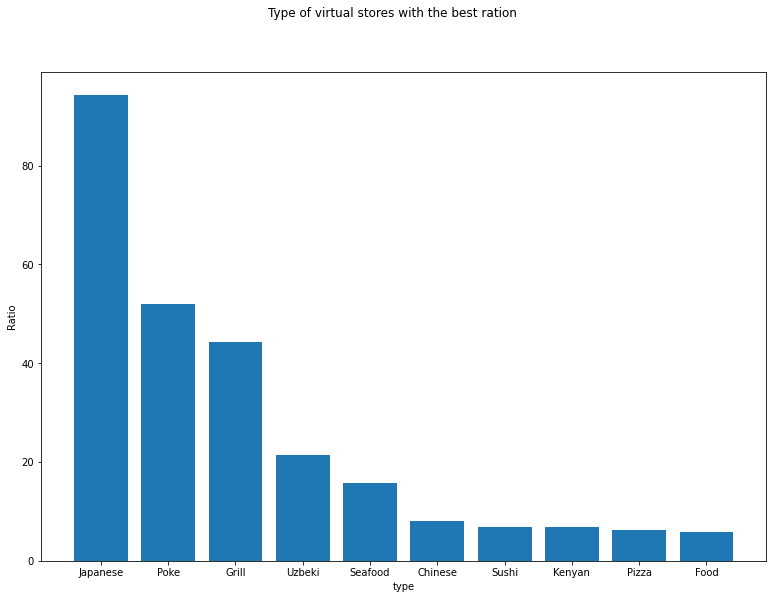

In [42]:
best_tags=tags_df.nlargest(10,'ratio_between_vir_mother')
names = best_tags.tags 
values = best_tags.ratio_between_vir_mother
fig, axs = plt.subplots(1,  figsize=(13, 9))
axs.bar(names, values)
fig.suptitle('Type of virtual stores with the best ration')
plt.xlabel('type')
plt.ylabel('Ratio')

In [43]:
real_store_most_income=vir_vs_real.groupby(['mother_store_id']).tot_income_real.sum().to_frame()
real_store_most_income=pd.DataFrame(real_store_most_income.to_records())
real_store_most_income.columns
#real_store_most_income = income_per_real_store.rename(columns={'gmv': 'tot_income_real'})
#del real_store_most_income["index"]
real_store_most_income


,mother_store_id,tot_income_real
0,337,5953.32
1,466,215873.16
2,764,6038.74
3,1521,40502.75
4,2037,1497.34
...,...,...
2194,248751,538.95
2195,249071,83.95
2196,249516,123.32
2197,249687,63.00


In [44]:
vir_store_most_income=vir_vs_real.groupby(['mother_store_id']).tot_income_vir.sum().to_frame()
vir_store_most_income=pd.DataFrame(vir_store_most_income.to_records())
vir_store_most_income.columns
#del vir_store_most_income["index"]
vir_store_most_income

,mother_store_id,tot_income_vir
0,337,1589.24
1,466,512.18
2,764,678.95
3,1521,2092.71
4,2037,1271.30
...,...,...
2194,248751,62.33
2195,249071,77.36
2196,249516,16.09
2197,249687,54.28


In [45]:
merger = pd.merge(real_store_most_income, vir_store_most_income,  how='inner', left_on=['mother_store_id'], right_on = ['mother_store_id'])
merger

,mother_store_id,tot_income_real,tot_income_vir
0,337,5953.32,1589.24
1,466,215873.16,512.18
2,764,6038.74,678.95
3,1521,40502.75,2092.71
4,2037,1497.34,1271.30
...,...,...,...
2194,248751,538.95,62.33
2195,249071,83.95,77.36
2196,249516,123.32,16.09
2197,249687,63.00,54.28


Text(0, 0.5, 'Income in millions ')

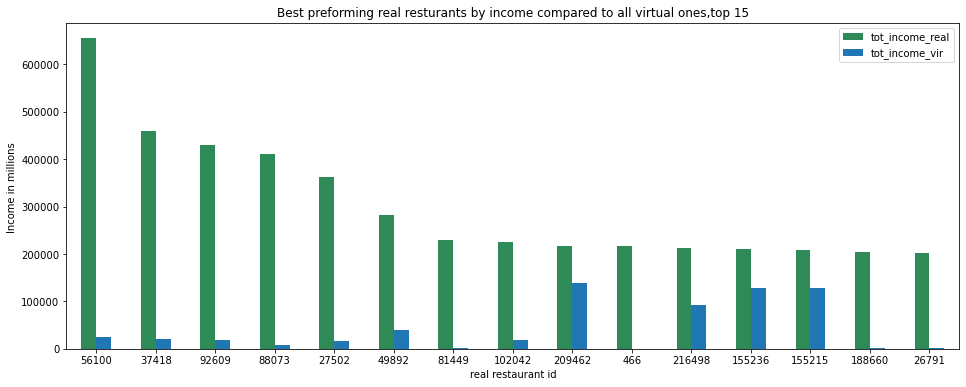

In [46]:
merger=merger.nlargest(15,'tot_income_real')
merger.plot(x="mother_store_id", y=["tot_income_real", "tot_income_vir"], kind="bar",figsize=(16,6),rot=0,color = ('seagreen','tab:blue'))
plt.title('Best preforming real resturants by income compared to all virtual ones,top 15')
plt.xlabel('real restaurant id')
plt.ylabel('Income in millions ')

In [47]:
tot_del_time=df_of_orders.groupby(['store_id']).total_delivery_duration.sum().to_frame()
tot_del_time=pd.DataFrame(tot_del_time.to_records())
tot_del_time

,store_id,total_delivery_duration
0,337,7035
1,466,150325
2,764,6434
3,1521,29147
4,2037,1866
...,...,...
6059,251201,0
6060,251225,289
6061,251259,333
6062,251281,290


In [48]:
tot_orders=df_of_orders.groupby(['store_id']).orders.sum().to_frame()
tot_orders=pd.DataFrame(tot_orders.to_records())
tot_orders

,store_id,orders
0,337,377
1,466,4813
2,764,206
3,1521,1280
4,2037,72
...,...,...
6059,251201,2
6060,251225,13
6061,251259,10
6062,251281,15


In [49]:
avg_del_time=tot_del_time.total_delivery_duration/tot_orders.orders
avg_del_time=avg_del_time.to_frame()
store_id = tot_del_time.store_id.tolist()
avg_del_time['store_id'] = store_id
avg_del_time

,0,store_id
0,18.660477,337
1,31.233119,466
2,31.233010,764
3,22.771094,1521
4,25.916667,2037
...,...,...
6059,0.000000,251201
6060,22.230769,251225
6061,33.300000,251259
6062,19.333333,251281


In [50]:
tot_bad_rat=df_of_orders.groupby(['store_id']).bad_ratings.sum().to_frame()
tot_bad_rat=pd.DataFrame(tot_bad_rat.to_records())
tot_bad_rat

,store_id,bad_ratings
0,337,22
1,466,135
2,764,13
3,1521,47
4,2037,4
...,...,...
6059,251201,0
6060,251225,1
6061,251259,0
6062,251281,1


Text(0, 0.5, 'Income ')

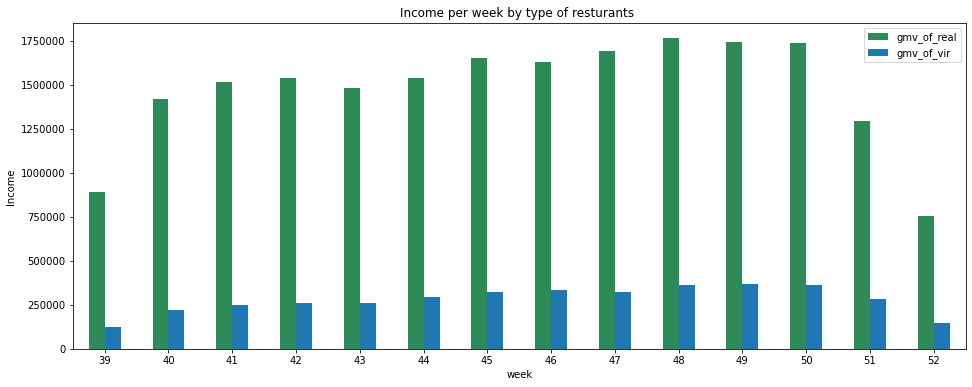

In [51]:
virtual_df['week'] = ( pd.to_datetime(virtual_df['week'], format="%m/%d/%Y" ))
real_store_df['week'] = ( pd.to_datetime(real_store_df['week'], format="%m/%d/%Y" ))
series_vir = virtual_df.groupby([virtual_df.week.dt.strftime('%W')]).gmv.sum().to_frame()
series_real=real_store_df.groupby([real_store_df.week.dt.strftime('%W')]).gmv.sum().to_frame()
series_vir=pd.DataFrame(series_vir.to_records())
series_real=pd.DataFrame(series_real.to_records())
merger = pd.merge(series_real, series_vir,  how='inner', left_on=['week'], right_on = ['week'])
merger = merger.rename(columns={'gmv_x': 'gmv_of_real'})
merger = merger.rename(columns={'gmv_y': 'gmv_of_vir'})
merger.plot(x="week", y=["gmv_of_real", "gmv_of_vir"], kind="bar",figsize=(16,6),rot=0,color = ('seagreen','tab:blue'))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Income per week by type of resturants ')
plt.ylabel('Income ')